In [3]:
import csv
import pandas as pd

In [5]:
data_oasis =  pd.read_csv("oasis.csv")
data_oasis.head()

,subject_id,hadm_id,stay_id,oasis,oasis_prob,age,age_score,preiculos,preiculos_score,gcs,...,resprate,resp_rate_score,temp,temp_score,urineoutput,urineoutput_score,mechvent,mechvent_score,electivesurgery,electivesurgery_score
0,15726063,23069026,36415879,27,0.061106,53.383987,6,73.000000,3,15.0,...,31.0,6.0,38.56,2.0,4580.0,0.0,0,0,0,6
1,19094009,22821215,30506515,31,0.097783,87.667951,9,60.000000,3,14.0,...,23.0,1.0,37.28,2.0,1150.0,5.0,0,0,0,6
2,13011410,27207074,37282334,22,0.033259,84.659836,9,715.816667,0,14.0,...,11.0,1.0,36.39,2.0,1500.0,1.0,0,0,0,6
3,14304873,20156152,35621403,28,0.068843,75.150576,6,9241.966667,1,14.0,...,32.0,6.0,35.40,4.0,2390.0,1.0,0,0,0,6
4,19033110,23390717,33897341,31,0.097783,75.075859,6,3948.750000,1,14.0,...,28.0,1.0,NaN,NaN,2070.0,1.0,1,9,0,6


In [6]:
data_admin =  pd.read_csv("admissions_patient.csv")
data_admin.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,race,edregtime,edouttime,hospital_expire_flag,subject_id.1,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000084,23052089,2160-11-21 01:56:00,2160-11-25 14:52:00,NaN,EW EMER.,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,...,WHITE,2160-11-20 20:36:00,2160-11-21 03:20:00,0,10000084,M,72,2160,2017 - 2019,2161-02-13
1,10000764,27897940,2132-10-14 23:31:00,2132-10-19 16:30:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicare,ENGLISH,...,WHITE,2132-10-14 19:31:00,2132-10-15 16:45:00,0,10000764,M,86,2132,2014 - 2016,NaN
2,10001860,21441082,2188-03-27 01:54:00,2188-03-30 19:25:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Medicare,ENGLISH,...,WHITE,2188-03-26 23:12:00,2188-03-27 03:22:00,0,10001860,M,84,2188,2011 - 2013,NaN
3,10002348,22725460,2112-11-30 22:22:00,2112-12-10 17:56:00,NaN,OBSERVATION ADMIT,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicare,ENGLISH,...,WHITE,2112-11-30 15:08:00,2112-11-30 23:24:00,0,10002348,F,77,2112,2017 - 2019,NaN
4,10003299,20940957,2183-06-26 20:27:00,2183-07-01 17:20:00,NaN,OBSERVATION ADMIT,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Other,ENGLISH,...,BLACK/AFRICAN AMERICAN,2183-06-26 13:58:00,2183-06-26 23:25:00,0,10003299,F,65,2173,2008 - 2010,2183-08-12


In [7]:
data_time =  pd.read_csv("./data/stayid_inouttime.csv")
data_time.head()

,hadm_id,stay_id,intime,outtime,los
0,26184834,37510196,2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817
1,23822395,33685454,2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912
2,28994087,31090461,2130-09-24 00:50:00,2130-09-27 22:13:41,3.891447
3,22725460,32610785,2112-11-30 23:24:00,2112-12-10 18:25:13,9.792512
4,23473524,35479615,2156-05-11 14:49:34,2156-05-22 14:16:46,10.977222


In [8]:
df_mid = pd.merge(data_admin,data_oasis,on = 'hadm_id')
df_all = pd.merge(df_mid, data_time, on = "stay_id")
df_all.head()


,subject_id_x,hadm_id_x,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,urineoutput,urineoutput_score,mechvent,mechvent_score,electivesurgery,electivesurgery_score,hadm_id_y,intime,outtime,los
0,10002348,22725460,2112-11-30 22:22:00,2112-12-10 17:56:00,NaN,OBSERVATION ADMIT,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicare,ENGLISH,...,325.0,10.0,0,0,0,6,22725460,2112-11-30 23:24:00,2112-12-10 18:25:13,9.792512
1,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,...,1200.0,5.0,1,9,0,6,24181354,2196-02-24 17:07:00,2196-02-29 15:58:02,4.952106
2,10004606,29242151,2159-02-20 13:43:00,2159-03-06 16:51:00,NaN,OBSERVATION ADMIT,EMERGENCY ROOM,HOME,Other,ENGLISH,...,2215.0,1.0,1,9,0,6,29242151,2159-02-20 16:10:03,2159-02-25 20:09:14,5.166100
3,10004720,22081550,2186-11-12 18:01:00,2186-11-17 18:30:00,2186-11-17 18:30:00,EW EMER.,INFORMATION NOT AVAILABLE,DIED,Medicare,ENGLISH,...,740.0,5.0,1,9,0,6,22081550,2186-11-12 19:55:00,2186-11-17 21:15:55,5.056192
4,10007677,27180483,2120-11-16 22:34:00,2120-12-18 14:04:00,NaN,EW EMER.,TRANSFER FROM HOSPITAL,REHAB,Medicare,?,...,675.0,5.0,0,0,0,6,27180483,2120-11-16 23:40:00,2120-11-22 18:49:26,5.798218


In [9]:
print(df_all.columns.values)

['subject_id_x' 'hadm_id_x' 'admittime' 'dischtime' 'deathtime'
 'admission_type' 'admission_location' 'discharge_location' 'insurance'
 'language' 'marital_status' 'race' 'edregtime' 'edouttime'
 'hospital_expire_flag' 'subject_id.1' 'gender' 'anchor_age' 'anchor_year'
 'anchor_year_group' 'dod' 'subject_id_y' 'stay_id' 'oasis' 'oasis_prob'
 'age' 'age_score' 'preiculos' 'preiculos_score' 'gcs' 'gcs_score'
 'heartrate' 'heart_rate_score' 'meanbp' 'mbp_score' 'resprate'
 'resp_rate_score' 'temp' 'temp_score' 'urineoutput' 'urineoutput_score'
 'mechvent' 'mechvent_score' 'electivesurgery' 'electivesurgery_score'
 'hadm_id_y' 'intime' 'outtime' 'los']


In [10]:
df_all['outcome'] = [1 if x >= 4 else 0 for x in df_all['los']]
df_all.head()

,subject_id_x,hadm_id_x,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,urineoutput_score,mechvent,mechvent_score,electivesurgery,electivesurgery_score,hadm_id_y,intime,outtime,los,outcome
0,10002348,22725460,2112-11-30 22:22:00,2112-12-10 17:56:00,NaN,OBSERVATION ADMIT,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicare,ENGLISH,...,10.0,0,0,0,6,22725460,2112-11-30 23:24:00,2112-12-10 18:25:13,9.792512,1
1,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,...,5.0,1,9,0,6,24181354,2196-02-24 17:07:00,2196-02-29 15:58:02,4.952106,1
2,10004606,29242151,2159-02-20 13:43:00,2159-03-06 16:51:00,NaN,OBSERVATION ADMIT,EMERGENCY ROOM,HOME,Other,ENGLISH,...,1.0,1,9,0,6,29242151,2159-02-20 16:10:03,2159-02-25 20:09:14,5.166100,1
3,10004720,22081550,2186-11-12 18:01:00,2186-11-17 18:30:00,2186-11-17 18:30:00,EW EMER.,INFORMATION NOT AVAILABLE,DIED,Medicare,ENGLISH,...,5.0,1,9,0,6,22081550,2186-11-12 19:55:00,2186-11-17 21:15:55,5.056192,1
4,10007677,27180483,2120-11-16 22:34:00,2120-12-18 14:04:00,NaN,EW EMER.,TRANSFER FROM HOSPITAL,REHAB,Medicare,?,...,5.0,0,0,0,6,27180483,2120-11-16 23:40:00,2120-11-22 18:49:26,5.798218,1


In [11]:
race_white = df_all[df_all["race"] == "WHITE"]
race_non = df_all[df_all["race"] != "WHITE"]
race_white.head()

,subject_id_x,hadm_id_x,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,urineoutput_score,mechvent,mechvent_score,electivesurgery,electivesurgery_score,hadm_id_y,intime,outtime,los,outcome
0,10002348,22725460,2112-11-30 22:22:00,2112-12-10 17:56:00,NaN,OBSERVATION ADMIT,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicare,ENGLISH,...,10.0,0,0,0,6,22725460,2112-11-30 23:24:00,2112-12-10 18:25:13,9.792512,1
2,10004606,29242151,2159-02-20 13:43:00,2159-03-06 16:51:00,NaN,OBSERVATION ADMIT,EMERGENCY ROOM,HOME,Other,ENGLISH,...,1.0,1,9,0,6,29242151,2159-02-20 16:10:03,2159-02-25 20:09:14,5.166100,1
3,10004720,22081550,2186-11-12 18:01:00,2186-11-17 18:30:00,2186-11-17 18:30:00,EW EMER.,INFORMATION NOT AVAILABLE,DIED,Medicare,ENGLISH,...,5.0,1,9,0,6,22081550,2186-11-12 19:55:00,2186-11-17 21:15:55,5.056192,1
5,10011427,20219031,2136-03-20 23:57:00,2136-04-08 16:37:00,NaN,EW EMER.,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,...,NaN,0,0,0,6,20219031,2136-03-21 11:41:40,2136-04-01 22:36:30,11.454745,1
6,10011427,22216667,2136-01-11 20:04:00,2136-02-12 17:05:00,NaN,EW EMER.,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,...,5.0,1,9,0,6,22216667,2136-01-24 21:25:25,2136-02-02 18:07:29,8.862546,1


In [12]:
len(race_non)

8365

In [13]:
len(race_white)

14769

In [14]:
insurance_med = df_all[df_all["insurance"] == "Medicare"]
insurance_non = df_all[df_all["insurance"] != "Medicare"]

In [15]:
len(insurance_med)

11000

In [16]:
language_eng = df_all[df_all["language"] == "ENGLISH"]
language_non = df_all[df_all["insurance"] != "ENGLISH"]

In [17]:
len(language_eng)

20661

In [18]:
df_all['marital_status'].value_counts(dropna=False)

MARRIED     10333
SINGLE       6390
WIDOWED      2779
NaN          1944
DIVORCED     1688
Name: marital_status, dtype: int64

In [19]:
married = df_all[df_all["marital_status"] == "MARRIED"]
married_non = df_all[df_all["marital_status"] != "MARRIED"]

In [20]:
len(married)

10333

In [21]:
df_all['discharge_location'].value_counts(dropna=False)

SKILLED NURSING FACILITY        4657
HOME HEALTH CARE                4304
DIED                            3858
CHRONIC/LONG TERM ACUTE CARE    3356
REHAB                           3109
HOME                            2575
HOSPICE                          694
ACUTE HOSPITAL                   246
PSYCH FACILITY                   136
AGAINST ADVICE                    79
OTHER FACILITY                    73
NaN                               34
ASSISTED LIVING                    9
HEALTHCARE FACILITY                4
Name: discharge_location, dtype: int64

In [22]:
discharge_home = df_all[(df_all["discharge_location"] == "HOME HEALTH CARE") | (df_all["discharge_location"] == "HOME")]
discharge_non = df_all[(df_all["discharge_location"] != "HOME HEALTH CARE") & (df_all["discharge_location"] != "HOME")]

In [23]:
len(discharge_home)

6879

In [24]:
len(discharge_non)

16255

In [25]:
df_all['outcome'] = [1 if x >= 4 else 0 for x in df_all['los']]
df_all.head()

,subject_id_x,hadm_id_x,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,urineoutput_score,mechvent,mechvent_score,electivesurgery,electivesurgery_score,hadm_id_y,intime,outtime,los,outcome
0,10002348,22725460,2112-11-30 22:22:00,2112-12-10 17:56:00,NaN,OBSERVATION ADMIT,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicare,ENGLISH,...,10.0,0,0,0,6,22725460,2112-11-30 23:24:00,2112-12-10 18:25:13,9.792512,1
1,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,...,5.0,1,9,0,6,24181354,2196-02-24 17:07:00,2196-02-29 15:58:02,4.952106,1
2,10004606,29242151,2159-02-20 13:43:00,2159-03-06 16:51:00,NaN,OBSERVATION ADMIT,EMERGENCY ROOM,HOME,Other,ENGLISH,...,1.0,1,9,0,6,29242151,2159-02-20 16:10:03,2159-02-25 20:09:14,5.166100,1
3,10004720,22081550,2186-11-12 18:01:00,2186-11-17 18:30:00,2186-11-17 18:30:00,EW EMER.,INFORMATION NOT AVAILABLE,DIED,Medicare,ENGLISH,...,5.0,1,9,0,6,22081550,2186-11-12 19:55:00,2186-11-17 21:15:55,5.056192,1
4,10007677,27180483,2120-11-16 22:34:00,2120-12-18 14:04:00,NaN,EW EMER.,TRANSFER FROM HOSPITAL,REHAB,Medicare,?,...,5.0,0,0,0,6,27180483,2120-11-16 23:40:00,2120-11-22 18:49:26,5.798218,1


In [26]:
df_all['outcome'].value_counts(dropna=False)

1    16508
0     6626
Name: outcome, dtype: int64

In [27]:
len(df_all)

23134

In [28]:
oasis1 =  pd.read_csv("./data/oasis_day1.csv")
oasis2 =  pd.read_csv("./data/oasis_day2.csv")
oasis3 =  pd.read_csv("./data/oasis_day3.csv")
sofa1 = pd.read_csv("./data/sofa_day1.csv")
sofa2 = pd.read_csv("./data/sofa_day2.csv")
sofa3 = pd.read_csv("./data/sofa_day3.csv")

In [29]:
len(sofa1)

23222

In [30]:
oasis1 = oasis1.rename(columns={c: c+'_day1' for c in oasis1.columns if c not in ['stay_id']})
oasis2 = oasis2.rename(columns={c: c+'_day2' for c in oasis2.columns if c not in ['stay_id']})
oasis3 = oasis3.rename(columns={c: c+'_day3' for c in oasis3.columns if c not in ['stay_id']})
sofa1 = sofa1.rename(columns={c: c+'_day1' for c in sofa1.columns if c not in ['stay_id']})
sofa2 = sofa2.rename(columns={c: c+'_day2' for c in sofa2.columns if c not in ['stay_id']})
sofa3 = sofa3.rename(columns={c: c+'_day3' for c in sofa3.columns if c not in ['stay_id']})

In [31]:
dfs = [oasis1, oasis2, oasis3, sofa1, sofa2, sofa3, data_time]
dfs = [df.set_index('stay_id') for df in dfs]
dfs[0].join(dfs[1:])

,subject_id_day1,hadm_id_day1,oasis_day1,oasis_prob_day1,age_day1,age_score_day1,preiculos_day1,preiculos_score_day1,gcs_day1,gcs_score_day1,...,rate_norepinephrine_avg_day3,rate_dopamine_avg_day3,rate_dobutamine_avg_day3,platelet_min_day3,creatinine_max_day3,bilirubin_max_day3,hadm_id,intime,outtime,los
stay_id,,,,,,,,,,,,,,,,,,,,,
36415879,15726063,23069026,27,0.061106,53.383987,6,73.000000,3,15.0,0.0,...,NaN,NaN,NaN,244.0,0.7,NaN,23069026.0,2168-05-20 12:59:00,2168-05-27 19:08:12,7.256389
30506515,19094009,22821215,31,0.097783,87.667951,9,60.000000,3,14.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37282334,13011410,27207074,22,0.033259,84.659836,9,715.816667,0,14.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35621403,14304873,20156152,28,0.068843,75.150576,6,9241.966667,1,14.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33897341,19033110,23390717,31,0.097783,75.075859,6,3948.750000,1,14.0,3.0,...,NaN,NaN,NaN,195.0,1.2,NaN,23390717.0,2186-01-31 10:46:45,2186-02-04 18:08:18,4.306632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30318346,16882451,24235047,28,0.068843,46.217122,3,122.100000,3,15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33919649,15716202,21531668,20,0.025967,84.805218,9,1136.033333,0,14.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38612688,16915170,20987661,20,0.025967,47.843902,3,23.000000,3,13.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
type(data_admin)

pandas.core.frame.DataFrame

In [33]:
df_final = pd.merge(dfs, data_admin, on = "hadm_id")
df_final.columns.values

TypeError: Can only merge Series or DataFrame objects, a <class 'list'> was passed

In [34]:
df_vital = pd.read_csv("./data/vitalsign.csv")
df_vital.head()

,stay_id,charttime,heart_rate,sbp,dbp
0,37510196,2131-01-11 04:00:00,NaN,NaN,NaN
1,37510196,2131-01-11 04:20:00,NaN,NaN,NaN
2,37510196,2131-01-11 04:22:00,38.0,NaN,NaN
3,37510196,2131-01-11 04:25:00,NaN,180.0,12.0
4,37510196,2131-01-11 05:00:00,60.0,NaN,NaN


In [35]:
from datetime import datetime, date, timedelta

In [36]:
pd.to_datetime(df_vital["charttime"])

0         2131-01-11 04:00:00
1         2131-01-11 04:20:00
2         2131-01-11 04:22:00
3         2131-01-11 04:25:00
4         2131-01-11 05:00:00
                  ...        
6859623   2164-09-17 13:17:00
6859624   2164-09-17 13:18:00
6859625   2164-09-17 13:20:00
6859626   2164-09-17 13:34:00
6859627   2164-09-17 13:39:00
Name: charttime, Length: 6859628, dtype: datetime64[ns]

In [37]:
type(df_vital["charttime"])

pandas.core.series.Series

In [38]:
datmean = df_vital["charttime"].resample('1H').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
hourly = pd.read_parquet("./data/si_pp_hourly.parquet")
hourly.head()

In [ ]:
mid = pd.merge(pd.merge(hourly, data_time, on = "stay_id"), data_admin, on = 'hadm_id')
df_p1_mid = mid[["stay_id", "hadm_id", "hr", "heart_rate", "sbp", "dbp", "shock_index", "pulse_pressure", "hospital_expire_flag"]]
df_p1 = df_p1_mid[df_p1_mid["hr"] <= 120]
df_p1.head()

In [39]:
dead_p1 = df_p1[df_p1["hospital_expire_flag"] == 1]
alive_p1 = df_p1[df_p1["hospital_expire_flag"] == 0]

NameError: name 'df_p1' is not defined

In [40]:
dead_p1

NameError: name 'dead_p1' is not defined

In [41]:
dead_p1["hr"].value_counts(dropna=False)

NameError: name 'dead_p1' is not defined

In [42]:
alive_p1["hr"].value_counts(dropna=False)

NameError: name 'alive_p1' is not defined

In [43]:
dead_shock = dead_p1.groupby('hr', as_index=False)['shock_index'].mean().dropna()
dead_shock

NameError: name 'dead_p1' is not defined

In [44]:
import matplotlib.pyplot as plt

In [45]:
plt.plot("hr", "shock_index",data = dead_shock, label = "Dead")
plt.plot("hr", "shock_index",data = alive_shock, label = "Alive")
plt.legend()
plt.savefig("shock_index.png")

NameError: name 'dead_shock' is not defined

In [46]:
dead_shock.plot(x='hr', y='shock_index', kind='line')
plt.show()

NameError: name 'dead_shock' is not defined

In [47]:
alive_shock = alive_p1.groupby('hr', as_index=False)['shock_index'].mean().dropna()
alive_shock.plot(x='hr', y='shock_index', kind='line')
plt.show()

NameError: name 'alive_p1' is not defined

In [48]:
dead_pulse = dead_p1.groupby('hr', as_index=False)['pulse_pressure'].mean().dropna()
dead_pulse.plot(x='hr', y='pulse_pressure', kind='line')
plt.show()

NameError: name 'dead_p1' is not defined

In [49]:
alive_pulse = alive_p1.groupby('hr', as_index=False)['pulse_pressure'].mean().dropna()
alive_pulse.plot(x='hr', y='pulse_pressure', kind='line')
plt.show()

NameError: name 'alive_p1' is not defined

In [50]:
plt.plot("hr", "pulse_pressure",data = dead_pulse, label = "Dead")
plt.plot("hr", "pulse_pressure",data = alive_pulse, label = "Alive")
plt.legend()
plt.savefig("pulse_pressure.png")

NameError: name 'dead_pulse' is not defined

In [51]:
sofa_hourly = pd.read_parquet("./data/sofa_hourly.parquet")
sofa_hourly.head()

,stay_id,hr,starttime,endtime,pao2fio2ratio_novent,pao2fio2ratio_vent,rate_epinephrine,rate_norepinephrine,rate_dopamine,rate_dobutamine,...,cardiovascular,cns,renal,respiration_24hours,coagulation_24hours,liver_24hours,cardiovascular_24hours,cns_24hours,renal_24hours,sofa_24hours
0,30000646,0,2194-04-29 01:00:00,2194-04-29 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,0,0,0,0,0,0,0
1,30000646,1,2194-04-29 02:00:00,2194-04-29 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,0.0,0,0,0,1,0,0,1
2,30000646,2,2194-04-29 03:00:00,2194-04-29 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,0,0,0,1,0,0,1
3,30000646,3,2194-04-29 04:00:00,2194-04-29 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0,0,0,1,0,0,1
4,30000646,4,2194-04-29 05:00:00,2194-04-29 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,0,0,0,1,0,0,1


In [52]:
mid2 = pd.merge(pd.merge(sofa_hourly, data_time, on = "stay_id"), data_admin, on = 'hadm_id')
df_p1_mid2 = mid2[["stay_id", "hadm_id", "hr", "sofa_24hours", "hospital_expire_flag"]]
df_p12 = df_p1_mid2[df_p1_mid2["hr"] <= 120]
df_p12.head()

,stay_id,hadm_id,hr,sofa_24hours,hospital_expire_flag
0,30000646,22795209,0,0,1
1,30000646,22795209,1,1,1
2,30000646,22795209,2,1,1
3,30000646,22795209,3,1,1
4,30000646,22795209,4,1,1


In [53]:
dead_sofa = df_p12[df_p12["hospital_expire_flag"] == 1]
alive_sofa = df_p12[df_p12["hospital_expire_flag"] == 0]

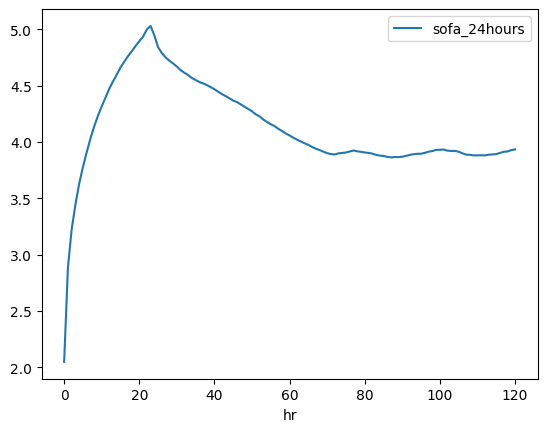

In [54]:
alive_sofa = alive_sofa.groupby('hr', as_index=False)['sofa_24hours'].mean().dropna()
alive_sofa.plot(x='hr', y='sofa_24hours', kind='line')
plt.show()

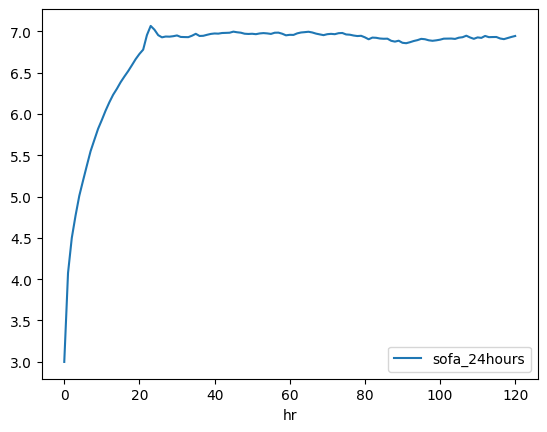

In [55]:
dead_sofa = dead_sofa.groupby('hr', as_index=False)['sofa_24hours'].mean().dropna()
dead_sofa.plot(x='hr', y='sofa_24hours', kind='line')
plt.show()

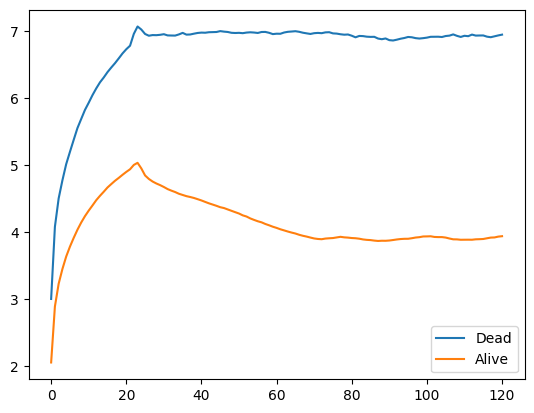

In [56]:
plt.plot("hr", "sofa_24hours",data = dead_sofa, label = "Dead")
plt.plot("hr", "sofa_24hours",data = alive_sofa, label = "Alive")
plt.legend()

In [57]:
patient_data = pd.read_csv("./data/patient_data.csv")
cluster = pd.read_csv("./data/sofa_hourly_cluster.csv")

In [58]:
df_p3 = patient_data.merge(cluster, on = "stay_id")
df_p3.head()

,Unnamed: 0,stay_id,age,gender,intime,outtime,deathtime,los,insurance,language,marital_status,race,discharge_location,charlson_comorbidity_index,hospital_expire_flag,cluster
0,0,36415879,53.383987,M,2168-05-20 12:59:00,2168-05-27 19:08:12,NaN,7.256389,Other,ENGLISH,SINGLE,WHITE,HOME HEALTH CARE,5,0,2
1,5,33897341,75.075859,F,2186-01-31 10:46:45,2186-02-04 18:08:18,NaN,4.306632,Medicare,ENGLISH,WIDOWED,WHITE,HOME HEALTH CARE,6,0,4
2,7,36870399,61.091912,F,2142-02-14 15:10:12,2142-02-24 01:46:25,NaN,9.441817,Other,ENGLISH,SINGLE,WHITE,SKILLED NURSING FACILITY,7,0,2
3,8,39433338,61.091912,F,2142-03-16 17:45:17,2142-03-23 11:20:35,NaN,6.732847,Other,ENGLISH,SINGLE,WHITE,SKILLED NURSING FACILITY,7,0,2
4,9,36305056,61.091912,F,2142-02-28 11:21:07,2142-03-06 19:02:52,NaN,6.320660,Other,ENGLISH,SINGLE,WHITE,SKILLED NURSING FACILITY,7,0,4


In [59]:
df_insurance = df_p3[["insurance", "cluster"]]

In [60]:
medicare = df_insurance[df_insurance["insurance"] == "Medicare"]
medicaid = df_insurance[df_insurance["insurance"] == "Medicaid"]
other = df_insurance[df_insurance["insurance"] == "Other"]

In [61]:
medicare_count = medicare.value_counts()
medicaid_count = medicaid.value_counts()
other_count = other.value_counts()

medicaid_count

insurance  cluster
Medicaid   0          380
           4          350
           1          299
           3          289
           2          255
dtype: int64

In [62]:
index = df_p3["cluster"].unique()

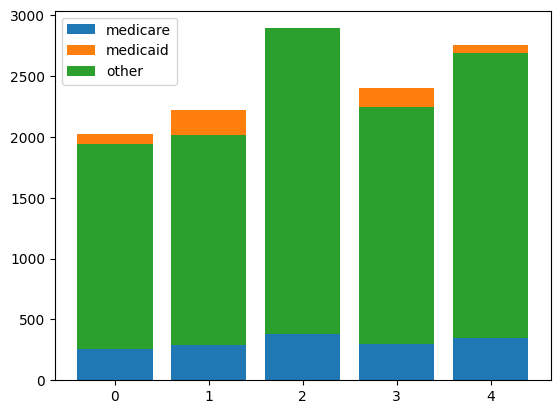

In [63]:
plt.bar(index,medicare_count, label = "medicare")
plt.bar(index,medicaid_count, bottom =medicare_count, label = "medicaid")
plt.bar(index,other_count, bottom =medicaid_count, label = "other")
plt.legend()
plt.show()

<AxesSubplot:xlabel='cluster'>

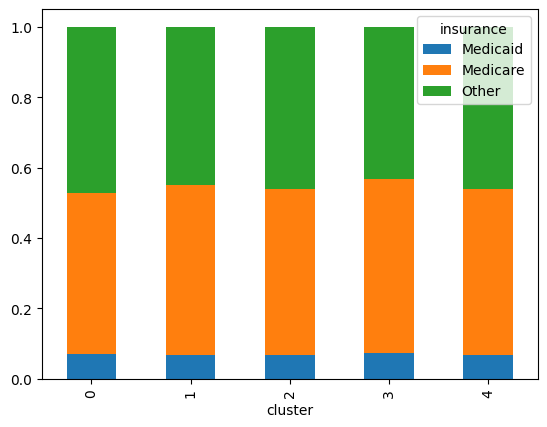

In [64]:
df_insurance.groupby(['cluster'])['insurance'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [65]:
import numpy as np

<AxesSubplot:xlabel='cluster'>

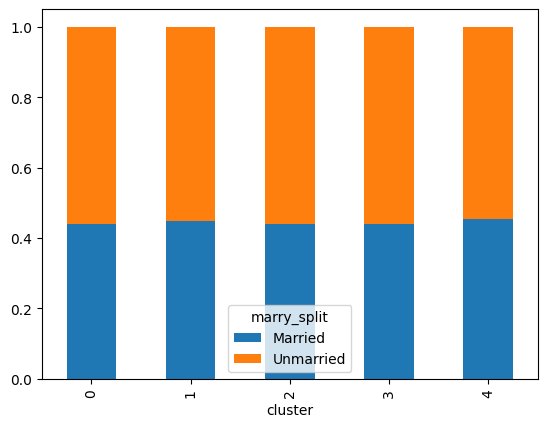

In [66]:
conditions = [
    (df_p3['marital_status'] == "MARRIED"),
    (df_p3['language'] != "MARRIED")
    ]

# create a list of the values we want to assign for each condition
values = ['Married', 'Unmarried']

# create a new column and use np.select to assign values to it using our lists as arguments
df_p3['marry_split'] = np.select(conditions, values)
df_p3.head()
df_marry = df_p3[["marry_split", "cluster"]]
df_marry.groupby(['cluster'])['marry_split'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [67]:
df_p3

,Unnamed: 0,stay_id,age,gender,intime,outtime,deathtime,los,insurance,language,marital_status,race,discharge_location,charlson_comorbidity_index,hospital_expire_flag,cluster,marry_split
0,0,36415879,53.383987,M,2168-05-20 12:59:00,2168-05-27 19:08:12,NaN,7.256389,Other,ENGLISH,SINGLE,WHITE,HOME HEALTH CARE,5,0,2,Unmarried
1,5,33897341,75.075859,F,2186-01-31 10:46:45,2186-02-04 18:08:18,NaN,4.306632,Medicare,ENGLISH,WIDOWED,WHITE,HOME HEALTH CARE,6,0,4,Unmarried
2,7,36870399,61.091912,F,2142-02-14 15:10:12,2142-02-24 01:46:25,NaN,9.441817,Other,ENGLISH,SINGLE,WHITE,SKILLED NURSING FACILITY,7,0,2,Unmarried
3,8,39433338,61.091912,F,2142-03-16 17:45:17,2142-03-23 11:20:35,NaN,6.732847,Other,ENGLISH,SINGLE,WHITE,SKILLED NURSING FACILITY,7,0,2,Unmarried
4,9,36305056,61.091912,F,2142-02-28 11:21:07,2142-03-06 19:02:52,NaN,6.320660,Other,ENGLISH,SINGLE,WHITE,SKILLED NURSING FACILITY,7,0,4,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22435,73116,37776066,89.938461,F,2112-12-08 18:23:08,2112-12-12 18:45:13,NaN,4.015336,Medicare,ENGLISH,WIDOWED,WHITE,SKILLED NURSING FACILITY,8,0,4,Unmarried
22436,73117,36882921,46.934088,F,2114-12-08 05:18:00,2114-12-11 21:01:14,NaN,3.655023,Other,ENGLISH,DIVORCED,WHITE,HOME HEALTH CARE,1,0,2,Unmarried
22437,73125,31836371,62.242664,F,2118-03-30 15:24:00,2118-04-03 19:44:52,NaN,4.181157,Other,ENGLISH,WIDOWED,BLACK/AFRICAN,REHAB,3,0,4,Unmarried
22438,73134,38536639,55.654113,M,2184-09-02 10:11:28,2184-09-07 15:13:20,NaN,5.209630,Other,ENGLISH,SINGLE,WHITE,HOME HEALTH CARE,3,0,4,Unmarried


In [71]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 8.3 MB/s eta 0:00:0000:0100:01m
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=692c38047c04a158f1d5a241b97c1a632612cc36ddbc9d76685dabc57693287a
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.4
    Uninstalling scipy-1.5.4:
      Successfully uninstalled scipy-1.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflict

In [69]:
surv = df_p3[["stay_id", "los", "cluster", "hospital_expire_flag", "intime", "deathtime", "outtime"]]

#surv["intime_date"] = datetime.strptime(surv["intime"], '%y-%m-%d %H:%M:%S')
surv["intime"] = pd.to_datetime(surv["intime"])
surv["deathtime"] = pd.to_datetime(surv["deathtime"])
surv["duration"] = (surv["deathtime"]-surv["intime"]).dt.days
#print(surv["duration"][0])
surv['duration'] = surv['duration'].fillna(90)
surv
        
#surv["duration"]
#(surv["deathtime"] - surv["intime"]).dt.days

/root/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/root/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/root/anaconda3/envs/tf1/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,stay_id,los,cluster,hospital_expire_flag,intime,deathtime,outtime,duration
0,36415879,7.256389,2,0,2168-05-20 12:59:00,NaT,2168-05-27 19:08:12,90.0
1,33897341,4.306632,4,0,2186-01-31 10:46:45,NaT,2186-02-04 18:08:18,90.0
2,36870399,9.441817,2,0,2142-02-14 15:10:12,NaT,2142-02-24 01:46:25,90.0
3,39433338,6.732847,2,0,2142-03-16 17:45:17,NaT,2142-03-23 11:20:35,90.0
4,36305056,6.320660,4,0,2142-02-28 11:21:07,NaT,2142-03-06 19:02:52,90.0
...,...,...,...,...,...,...,...,...
22435,37776066,4.015336,4,0,2112-12-08 18:23:08,NaT,2112-12-12 18:45:13,90.0
22436,36882921,3.655023,2,0,2114-12-08 05:18:00,NaT,2114-12-11 21:01:14,90.0
22437,31836371,4.181157,4,0,2118-03-30 15:24:00,NaT,2118-04-03 19:44:52,90.0
22438,38536639,5.209630,4,0,2184-09-02 10:11:28,NaT,2184-09-07 15:13:20,90.0


In [89]:
len(surv)

22440

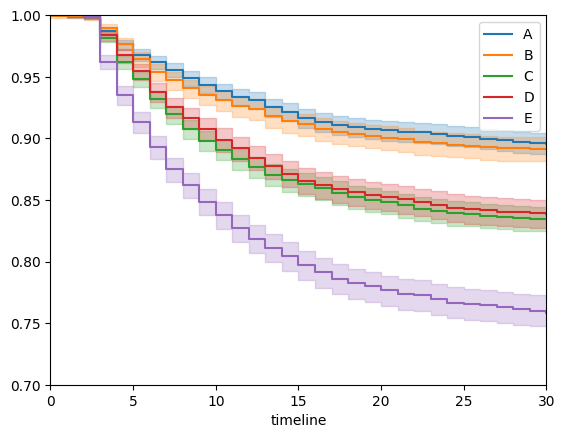

In [91]:

from lifelines import KaplanMeierFitter
kmf1 = KaplanMeierFitter() 

ga = surv[surv["cluster"] == 4]
gb = surv[surv["cluster"] == 2]
gc = surv[surv["cluster"] == 0]
gd = surv[surv["cluster"] == 3]
ge = surv[surv["cluster"] == 1]

## fit the model for 1st cohort
kmf1.fit(ga["duration"], ga["hospital_expire_flag"], label='A')
ax = kmf1.plot_survival_function()
kmf1.fit(gb["duration"], gb["hospital_expire_flag"], label='B')
ax = kmf1.plot_survival_function(ax=ax)
kmf1.fit(gc["duration"], gc["hospital_expire_flag"], label='C')
ax = kmf1.plot_survival_function(ax=ax)
kmf1.fit(gd["duration"], gd["hospital_expire_flag"], label='D')
ax = kmf1.plot_survival_function(ax=ax)
kmf1.fit(ge["duration"], ge["hospital_expire_flag"], label='E')
ax = kmf1.plot_survival_function(ax=ax)


plt.xlim([0,30])
plt.ylim([0.7,1])

plt.savefig("survival.png")

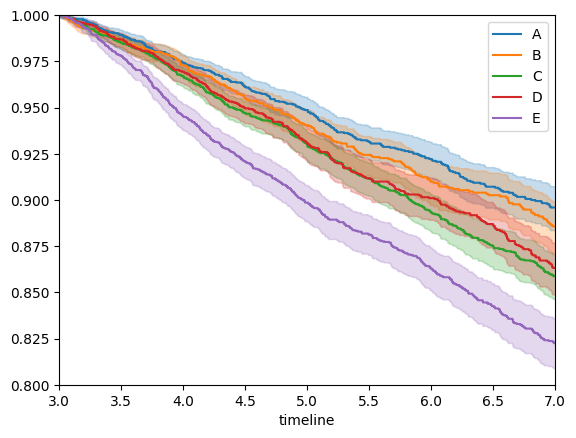

In [106]:

kmf = KaplanMeierFitter()
kmf.fit(ga["los"], ga["hospital_expire_flag"], label='A')
ax = kmf.plot_survival_function()
kmf.fit(gb["los"], gb["hospital_expire_flag"], label='B')
ax = kmf.plot_survival_function(ax=ax)
kmf.fit(gc["los"], gc["hospital_expire_flag"], label='C')
ax = kmf.plot_survival_function(ax=ax)
kmf.fit(gd["los"], gd["hospital_expire_flag"], label='D')
ax = kmf.plot_survival_function(ax=ax)
kmf.fit(ge["los"], ge["hospital_expire_flag"], label='E')
ax = kmf.plot_survival_function(ax=ax)


plt.xlim([3,7])
plt.ylim([0.8,1])

plt.savefig("survival_los.png")

In [101]:
surv["los"].max()

103.49900462963